
========================================================<br>
<br>
   File name   : YOLOv3_colab_training.ipynb<br>
   Author      : PyLessons<br>
   Created date: 2020-05-26<br>
   Website     : https://pylessons.com/YOLOv3-TF2-GoogleColab<br>
   GitHub      : https://github.com/pythonlessons/TensorFlow-2.x-YOLOv3<br>
   Description : Train custom model on Google colab tutorial<br>
<br>
================================================================


**Open this notebook from google drive**<br>
**Go to "Edit" -> "Notebook settings" and enable GPU.**


In [ ]:
# Check if NVIDIA GPU is enabled
!nvidia-smi

Thu Jul 23 12:10:10 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 450.51.05    Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   65C    P8    11W /  70W |      0MiB / 15079MiB |      0%      Default |
|                               |                      |                 ERR! |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

**Connect and authorize google drive with google colab:**

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')
!ls

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive
gdrive	sample_data


**Open our project "TensorFlow-2.x-YOLOv3" direcotry in google drive:**

In [2]:
%cd /content/gdrive/My Drive/TensorFlow-2.x-YOLOv3-master
!ls

/content/gdrive/My Drive/TensorFlow-2.x-YOLOv3-master
 checkpoints	      'log (11)'	  'OIDv4_ToolKit (1)'
 cnn_classifier.h5    'log (2)'		  'OIDv4_ToolKit (2)'
 custom_dataset       'log (3)'		   __pycache__
 deep_sort	      'log (4)'		   README.md
 detection_custom.py  'log (5)'		   recognized.txt
 detection_demo.py    'log (6)'		   requirements.txt
 detection.png	      'log (7)'		   Segmentation
 detect_mnist.py      'log (8)'		   tools
 evaluate_mAP.py      'log (9)'		   train.py
 IMAGES		       mnist		   yolov3
 log		       model_data	   YOLOv3_colab_training.ipynb
'log (1)'	       object_tracker.py
'log (10)'	       OIDv4_ToolKit


**Install all required libraries for our project:**

In [ ]:
!pip install -r ./requirements.txt

     |████████████████████████████████| 43.7MB 69kB/s 
     |████████████████████████████████| 61kB 5.5MB/s 
     |████████████████████████████████| 1.3MB 36.1MB/s 
     |████████████████████████████████| 6.4MB 39.4MB/s 
  Created wheel for wget: filename=wget-3.2-cp36-none-any.whl size=9682 sha256=560d5c2d9c51c2b365479fa76c7287b605f19a1f11eda6ed0b450f83cdb20c4e
  Stored in directory: /root/.cache/pip/wheels/40/15/30/7d8f7cea2902b4db79e3fea550d7d7b85ecb27ef992b618f3f
  Created wheel for awscli: filename=awscli-1.18.104-py2.py3-none-any.whl size=3260239 sha256=74b7e7bd9f8581abe6ef2e35acf38ec3248f53b42132efcc2e77bbd4d4b25a88
  Stored in directory: /root/.cache/pip/wheels/20/85/c9/3eeb0f9d8a91b2296856a7a247f534f0236f94691606d97b2e
Successfully built wget awscli
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.
  Found existing installation: opencv-python 4.1.2.30
    Uninstalling opencv-python-4.1.2.30:
      Successfull

**Download yolov3.weights if you don't have it:**

In [ ]:
!wget -P model_data https://pjreddie.com/media/files/yolov3.weights

--2020-07-15 16:06:16--  https://pjreddie.com/media/files/yolov3.weights
Resolving pjreddie.com (pjreddie.com)... 128.208.4.108
Connecting to pjreddie.com (pjreddie.com)|128.208.4.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 248007048 (237M) [application/octet-stream]
Saving to: ‘model_data/yolov3.weights.1’

yolov3.weights.1    100%[===================>] 236.52M   171KB/s    in 16m 57s 

2020-07-15 16:23:14 (238 KB/s) - ‘model_data/yolov3.weights.1’ saved [248007048/248007048]



**Test if TensorFlow works with gpu for you, in output should see similar results:**
```
2.2.0
'/device:GPU:0'
```

In [4]:
import tensorflow as tf
print(tf.__version__)
tf.test.gpu_device_name()

2.2.0


'/device:GPU:0'


**Test by loading trained model:**

In [3]:
import cv2
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline  
import tensorflow as tf
from yolov3.yolov3 import Create_Yolov3
from yolov3.utils import load_yolo_weights, detect_image, detect_video
from yolov3.configs import *
from Segmentation.digits import plate_segmentation
import os
import pickle
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from keras.models import Sequential, load_model
from keras.layers import Dense, Conv2D, MaxPooling2D, Dropout, Flatten

input_size = YOLO_INPUT_SIZE
Darknet_weights = YOLO_DARKNET_WEIGHTS

yolo = Create_Yolov3(input_size=input_size)
load_yolo_weights(yolo, Darknet_weights) # use Darknet weights

Using TensorFlow backend.


**Test by testing detection on original model:**

In [ ]:
image_path   = "./IMAGES/street.jpg"

image = detect_image(yolo, image_path, '', input_size=input_size, show=False, rectangle_colors=(255,0,0))
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(30,15))
plt.imshow(image)

Output hidden; open in https://colab.research.google.com to view.

**Run `XML_to_YOLOv3.py` script to convert XML files to YOLOv3 annotations files:**

In [ ]:
!python tools/XML_to_YOLOv3.py

/content/gdrive/My Drive/TensorFlow-2.x-YOLOv3/custom_dataset/train
/content/gdrive/My Drive/TensorFlow-2.x-YOLOv3/custom_dataset/train/1.jpg 650,576,959,749,0
/content/gdrive/My Drive/TensorFlow-2.x-YOLOv3/custom_dataset/train/2.jpg 215,190,409,294,0
/content/gdrive/My Drive/TensorFlow-2.x-YOLOv3/custom_dataset/train/3.jpg 845,429,932,488,0
/content/gdrive/My Drive/TensorFlow-2.x-YOLOv3/custom_dataset/train/4.jpg 71,113,397,220,0
/content/gdrive/My Drive/TensorFlow-2.x-YOLOv3/custom_dataset/train/6.jpg 784,493,944,593,0
/content/gdrive/My Drive/TensorFlow-2.x-YOLOv3/custom_dataset/train/7.jpg 275,215,463,262,0
/content/gdrive/My Drive/TensorFlow-2.x-YOLOv3/custom_dataset/train/8.jpg 323,508,500,609,0
/content/gdrive/My Drive/TensorFlow-2.x-YOLOv3/custom_dataset/train/9.jpg 140,177,238,200,0
/content/gdrive/My Drive/TensorFlow-2.x-YOLOv3/custom_dataset/train/10.jpg 154,126,315,174,0
/content/gdrive/My Drive/TensorFlow-2.x-YOLOv3/custom_dataset/train/dayride_type1_001.mp4#t=754.jpg 506,

**Start training custom model:**

In [ ]:
from train import *
tf.keras.backend.clear_session()
main()

**Create Yolo v3 custom model and load custom trained weights**

In [4]:
yolo = Create_Yolov3(input_size=input_size, CLASSES=TRAIN_CLASSES)
yolo.load_weights("./checkpoints/yolov3_custom") # use keras weights

**Test the detection with `IMAGES/plate_2.jpg` image**

In [5]:
from google.colab.patches import cv2_imshow
from PIL import Image

[1590 1637 2495 1922]
[ 593 1112  659 1148]


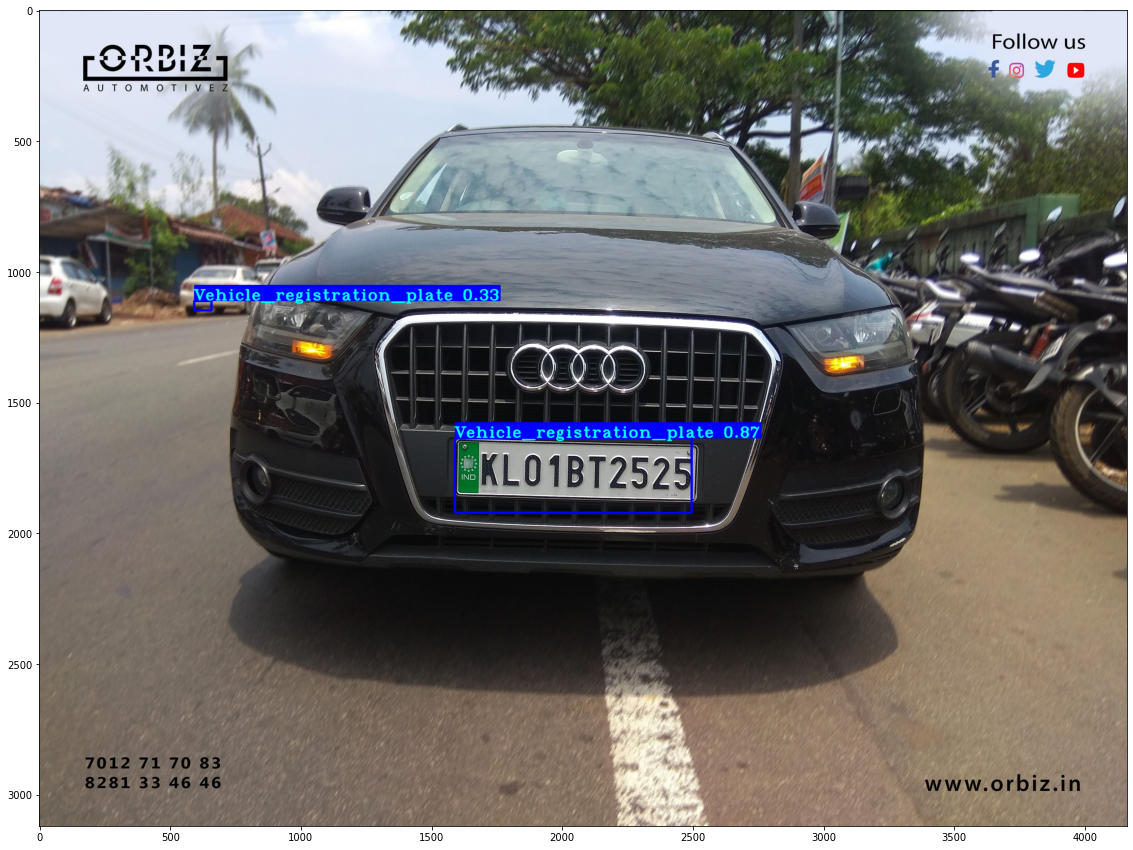

In [10]:
image_path   = "./IMAGES/d7e06425bcb8ae719796190434d1b649.jpg"
image, coord = detect_image(yolo, image_path, "", input_size=input_size, show=False, CLASSES=TRAIN_CLASSES, rectangle_colors=(255,0,0))

'''video_path = "./IMAGES/vlc-record-2020-07-16-12h29m40s-How to Drive in India (India’s Unofficial Road Rules) #HowToRock.mp4"
detect_video(yolo, video_path, './IMAGES/detected2.mp4', input_size=input_size, show=False, CLASSES=TRAIN_CLASSES, rectangle_colors=(255,0,0))'''
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(30,15))
plt.imshow(image)

In [11]:
coord.pop()

array([ 593, 1112,  659, 1148], dtype=int32)

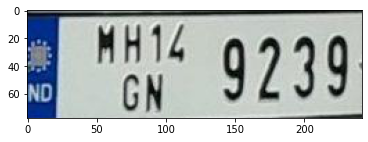

In [ ]:
coords = (343,333,585,411)
image_obj = Image.open("/content/gdrive/My Drive/TensorFlow-2.x-YOLOv3-master/IMAGES/mcms.jpg")
cropped_image = image_obj.crop(coords)
plt.imshow(cropped_image)

In [ ]:
%cd /content/gdrive/My Drive/TensorFlow-2.x-YOLOv3-master/IMAGES
image = cv2.imread("/content/gdrive/My Drive/TensorFlow-2.x-YOLOv3-master/IMAGES/CallTaxi-TamilNadu1.jpg")
image_edit = image[1421:1503, 172:]
cv2_imshow(image_edit)

/content/gdrive/My Drive/TensorFlow-2.x-YOLOv3-master/IMAGES


error: ignored

# **You just trained your first Yolo v3 custom object detector on google colab, GOOD JOB!!**

In [ ]:
%cd /content/gdrive/My Drive/TensorFlow-2.x-YOLOv3-master
!git clone https://github.com/pythonlessons/OIDv4_ToolKit.git

/content/gdrive/My Drive/TensorFlow-2.x-YOLOv3-master
Cloning into 'OIDv4_ToolKit'...
remote: Enumerating objects: 439, done.
remote: Total 439 (delta 0), reused 0 (delta 0), pack-reused 439
Receiving objects: 100% (439/439), 34.09 MiB | 17.68 MiB/s, done.
Resolving deltas: 100% (155/155), done.


In [ ]:
!pip install -r OIDv4_ToolKit/requirements.txt

     |████████████████████████████████| 3.2MB 4.1MB/s 
  Found existing installation: rsa 4.6
    Uninstalling rsa-4.6:
      Successfully uninstalled rsa-4.6


In [ ]:
%cd /content/gdrive/My Drive/TensorFlow-2.x-YOLOv3-master/OIDv4_ToolKit/
!python main.py downloader --classes 'Vehicle registration plate' --type_csv train --limit 1500

/content/gdrive/My Drive/TensorFlow-2.x-YOLOv3-master/OIDv4_ToolKit

		   ___   _____  ______            _    _    
		 .'   `.|_   _||_   _ `.         | |  | |   
		/  .-.  \ | |    | | `. \ _   __ | |__| |_  
		| |   | | | |    | |  | |[ \ [  ]|____   _| 
		\  `-'  /_| |_  _| |_.' / \ \/ /     _| |_  
		 `.___.'|_____||______.'   \__/     |_____|
	

             _____                    _                 _             
            (____ \                  | |               | |            
             _   \ \ ___  _ _ _ ____ | | ___   ____  _ | | ____  ____ 
            | |   | / _ \| | | |  _ \| |/ _ \ / _  |/ || |/ _  )/ ___)
            | |__/ / |_| | | | | | | | | |_| ( ( | ( (_| ( (/ /| |    
            |_____/ \___/ \____|_| |_|_|\___/ \_||_|\____|\____)_|    
                                                          
        
    [INFO] | Downloading Vehicle registration plate.
   [ERROR] | Missing the class-descriptions-boxable.csv file.
[DOWNLOAD] | Do you want to download t

In [ ]:
!python main.py downloader --classes 'Vehicle registration plate' --type_csv validation --limit 300


		   ___   _____  ______            _    _    
		 .'   `.|_   _||_   _ `.         | |  | |   
		/  .-.  \ | |    | | `. \ _   __ | |__| |_  
		| |   | | | |    | |  | |[ \ [  ]|____   _| 
		\  `-'  /_| |_  _| |_.' / \ \/ /     _| |_  
		 `.___.'|_____||______.'   \__/     |_____|
	

             _____                    _                 _             
            (____ \                  | |               | |            
             _   \ \ ___  _ _ _ ____ | | ___   ____  _ | | ____  ____ 
            | |   | / _ \| | | |  _ \| |/ _ \ / _  |/ || |/ _  )/ ___)
            | |__/ / |_| | | | | | | | | |_| ( ( | ( (_| ( (/ /| |    
            |_____/ \___/ \____|_| |_|_|\___/ \_||_|\____|\____)_|    
                                                          
        
    [INFO] | Downloading Vehicle registration plate.
   [ERROR] | Missing the validation-annotations-bbox.csv file.
[DOWNLOAD] | Do you want to download the missing file? [Y/n] y
...100%, 16 MB, 36129 KB/s, 0 seconds pass

In [ ]:
%cd /content/gdrive/My Drive/TensorFlow-2.x-YOLOv3-master/tools
!python oid_to_pascal_voc_xml.py

/content/gdrive/My Drive/TensorFlow-2.x-YOLOv3-master/tools
Currently in Subdirectory: train

Creating PASCAL VOC XML Files for Class: Vehicle_registration_plate
100% 1500/1500 [00:44<00:00, 33.83it/s]
Currently in Subdirectory: validation

Creating PASCAL VOC XML Files for Class: Vehicle_registration_plate
100% 300/300 [00:08<00:00, 33.64it/s]


In [ ]:
%cd /content/gdrive/My Drive/TensorFlow-2.x-YOLOv3-master
!sudo apt install tesseract-ocr
!pip install pytesseract
import pytesseract

In [8]:
cv2_imshow(d)

NameError: ignored

[['N']]


[['R']]


[['0']]


[['X']]


[['5']]


[['2']]


[['2']]


[['T']]


[['L']]


[['1']]


[['U']]


[['D']]


[['L']]


[['I']]


[['T']]


[['L']]


[['H']]


[['N']]


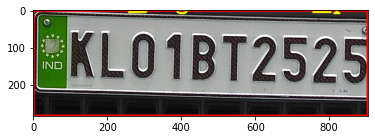

In [12]:
# Import required packages 

model = load_model('cnn_classifier.h5')
for i in range(len(coord)):
	coor = coord[i]
	crop = image[coor[1]:coor[3], coor[0]:coor[2]]
	digits = plate_segmentation(crop)
# Looping through the identified contours 
# Then rectangular part is cropped and passed on 
# to pytesseract for extracting text from it 
# Extracted text is then written into the text file 
	for d in digits:
		file = open("recognized.txt", "w")
		cv2_imshow(d)
		d = np.reshape(d, (1,28,28,1))
		out = model.predict(d)
    # Get max pre arg
		p = []
		precision = 0
		for i in range(len(out)):
			z = np.zeros(36)
			z[np.argmax(out[i])] = 1.
			precision = max(out[i])
			p.append(z)
			prediction = np.array(p)

    # Inverse one hot encoding
		alphabets = ['0','1','2','3','4','5','6','7','8','9','A','B','C','D','E','F','G','H','I','J','K','L','M','N','O','P','Q','R','S','T','U','V','W','X','Y','Z']
		classes = []
		for a in alphabets:
			classes.append([a])
		ohe = OneHotEncoder(handle_unknown='ignore')
		ohe.fit(classes)
		pred = ohe.inverse_transform(prediction)

		print(pred)
		file.write(pred[0][0])
		file.close()



In [21]:
text

NameError: ignored

In [ ]:
coord = np.array(coord)
for i in range(len(coord)):
  coor = coord[i]
  crop = image[coor[1]:coor[3], coor[0]:coor[2]]
  gray = cv2.cvtColor(crop, cv2.COLOR_BGR2GRAY)
  cv2_imshow(gray)
  text = pytesseract.image_to_string(gray)
  print(text)